# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from datetime import datetime
#Requried for date reformating 
from citipy import citipy



In [206]:
#Check API was successfully imported
weather_api_key

'a6e3c764b36b9205d78e7bf42ce37c51'

### Generate the Cities List by Using the `citipy` Library

In [207]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [208]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
MAX_CITIES = None    #Debug to limit API Search, set to "None" to seach through full library


# Build partial query URL
query_url = f"{url}units={units}&appid={weather_api_key}"

#-------------------------------------------------------------------------

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:MAX_CITIES]):    # DEBUG: Limiting the API key serach to make code more manageable and "not burn the API key".
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #city_date = city_weather["dt"]
        #Cleaning Date
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:    #Removing the "Bare except", not ideal in common practice
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bucak
Processing Record 2 of Set 1 | merauke
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | gobabis
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | umbuzeiro
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | peto
Processing Record 20 of Set 1 | erenhot
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | antalaha
P

In [209]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [210]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bucak,37.4592,30.5950,5.29,89,91,1.10,TR,2023-04-01 23:19:35
1,merauke,-8.4667,140.3333,27.57,78,20,3.70,ID,2023-04-01 23:19:36
2,caravelas,-17.7125,-39.2481,26.04,77,1,4.03,BR,2023-04-01 23:19:37
3,albany,42.6001,-73.9662,14.09,74,15,3.63,US,2023-04-01 23:19:20
4,beringovskiy,63.0500,179.3167,-8.06,67,55,8.81,RU,2023-04-01 23:19:38


In [211]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [212]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bucak,37.4592,30.5950,5.29,89,91,1.10,TR,2023-04-01 23:19:35
1,merauke,-8.4667,140.3333,27.57,78,20,3.70,ID,2023-04-01 23:19:36
2,caravelas,-17.7125,-39.2481,26.04,77,1,4.03,BR,2023-04-01 23:19:37
3,albany,42.6001,-73.9662,14.09,74,15,3.63,US,2023-04-01 23:19:20
4,beringovskiy,63.0500,179.3167,-8.06,67,55,8.81,RU,2023-04-01 23:19:38


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

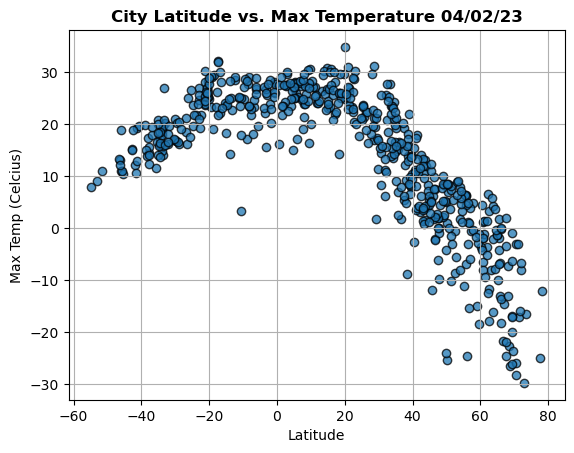

In [213]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.75,
            label='Cities')
# Incorporate the other graph properties
#Incorporating cool date stamp function
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"),fontweight="bold")
plt.ylabel("Max Temp (Celcius)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

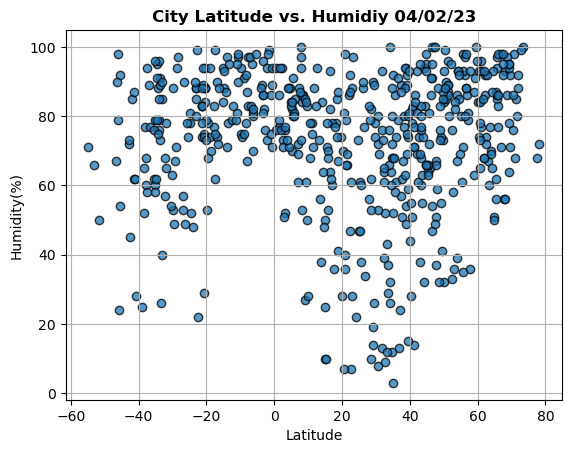

In [214]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.75,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidiy '+ time.strftime("%x"),fontweight="bold")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

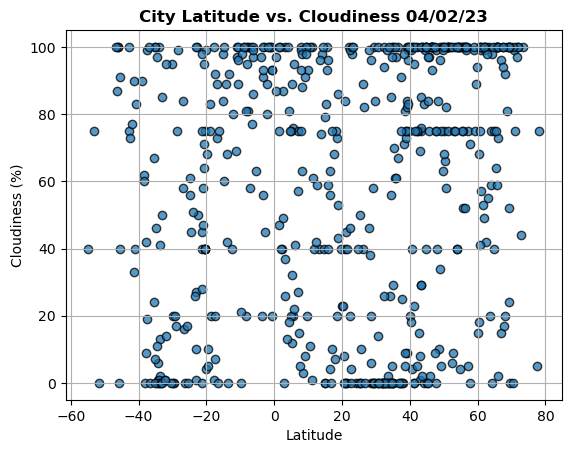

In [215]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.75,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime("%x"),fontweight="bold")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

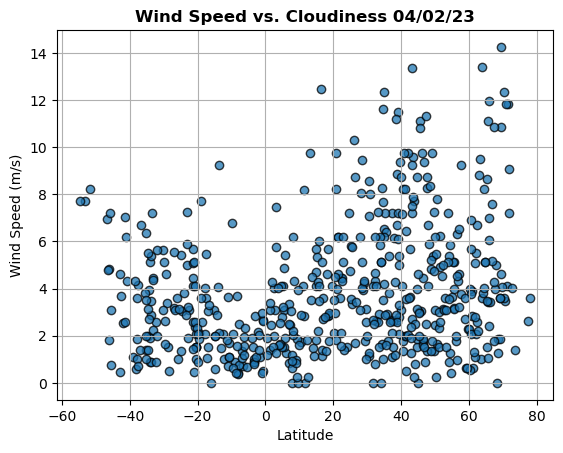

In [216]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.75,
            label='Cities')
# Incorporate the other graph properties
plt.title(f'Wind Speed vs. Cloudiness '+ time.strftime("%x"),fontweight="bold")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [251]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, title_extra, text_coordinates):
    # Linear regression on Northern Hemisphere
    x_values = df[x_col].astype("float")
    y_values = df[y_col].astype("float")

    # Run linear regression
    #Probably dont need the p-Value / std error in here but leaving for future reference
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}\n")

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    #plt.annotate(f"R squared: {rvalue**2}",(6,10),fontsize=15,color="red",)
    

    # Label plot
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.title(f'{y_col} vs. {x_col} ' + title_extra + time.strftime("%Y-%m-%d"),fontweight="bold")    #Setting up the ISO format for the date stamp
    
    plt.show()

    print(f"The linear regression line is: {line_eq}"
          f"The r-value is: {rvalue:.3f}\n"
          f"The r squared is: {round(rvalue**2,3)}\n"
          #f"The p Value is:{pvalue:.3f} \n"
          )

    
  

In [252]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
norther_hemi_filter_s = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[norther_hemi_filter_s]
southern_hemi_df = city_data_df.loc[~norther_hemi_filter_s]    #We can get the southenr data with the "~", grabs the opposite
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bucak,37.4592,30.5950,5.29,89,91,1.10,TR,2023-04-01 23:19:35
3,albany,42.6001,-73.9662,14.09,74,15,3.63,US,2023-04-01 23:19:20
4,beringovskiy,63.0500,179.3167,-8.06,67,55,8.81,RU,2023-04-01 23:19:38
8,fortuna,40.5982,-124.1573,10.55,78,100,1.79,US,2023-04-01 23:19:40
15,kapaa,22.0752,-159.3190,23.18,86,100,3.60,US,2023-04-01 23:19:45


###  Temperature vs. Latitude Linear Regression Plot

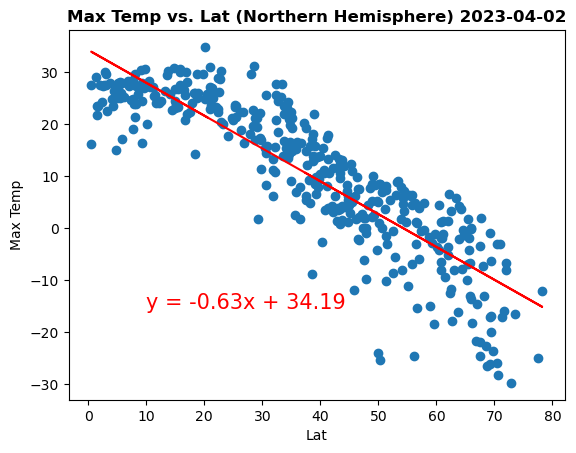

The linear regression line is: y = -0.63x + 34.19
The r-value is: -0.875
The r squared is: 0.765



In [253]:
#Tri one Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", "(Northern Hemisphere) ", (10,-20))



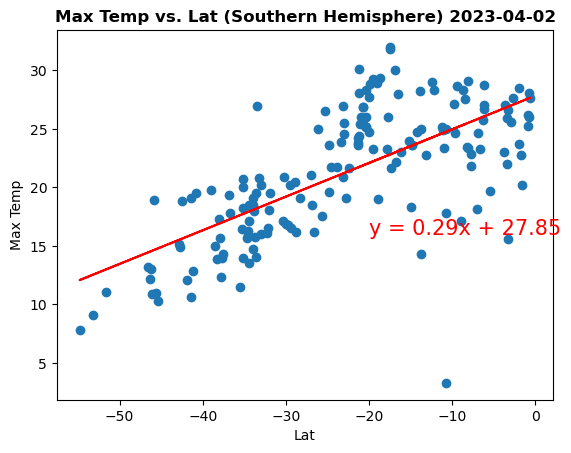

The linear regression line is: y = 0.29x + 27.85
The r-value is: 0.686
The r squared is: 0.47



In [254]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", "(Southern Hemisphere) ",(-20,14))


**Discussion about the linear relationship:** 

As sighted in the two graphs above, there seems to be a strong negative correlation between Max Temperature and Latitude in the Northern Hemisphere (r- value of -0.875). Due to the how seasonality juxtaposes between the hemispheres, we see an inverse (but slightly less) possitive correlation between Temperature and Latitude in the Southern Hemisphere (r-value of 0.69). 

### Humidity vs. Latitude Linear Regression Plot

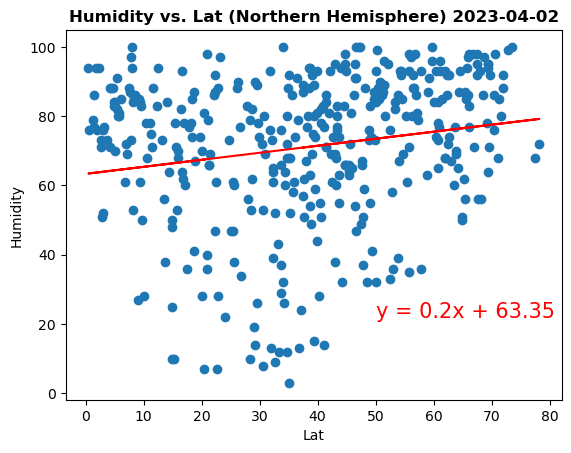

The linear regression line is: y = 0.2x + 63.35
The r-value is: 0.186
The r squared is: 0.034



In [262]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", "(Northern Hemisphere) ",(50,15))

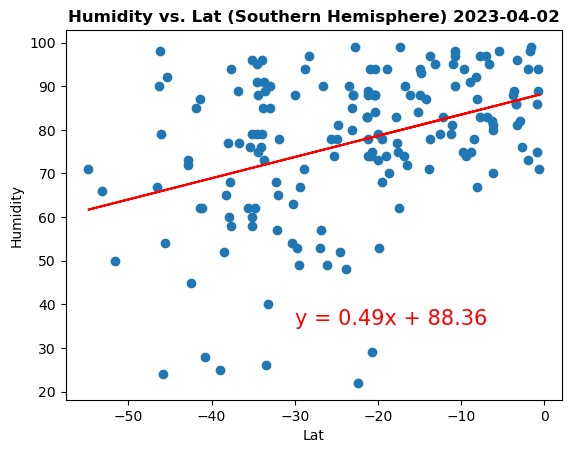

The linear regression line is: y = 0.49x + 88.36
The r-value is: 0.388
The r squared is: 0.151



In [261]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", "(Southern Hemisphere) ",(-30,30))

**Discussion about the linear relationship:** 

Unlike the justaposing erelationshiop between Temperature vs Latitude, Humidity vs Latitude shows a weaker possitive correlation between both hemispheres. 
    
    1. Northern Hemisphere: r-value is 0.186. As this value is very close to 0 we can say there semms to be a lack of linear relationship.
    
    2. Southern Hemisphere: r-value is 0.388. This shows somewhat of a stonger relationhip compared to the nothern hemisphere but still a while away form a perfect correlation (r value = 1).

### Cloudiness vs. Latitude Linear Regression Plot

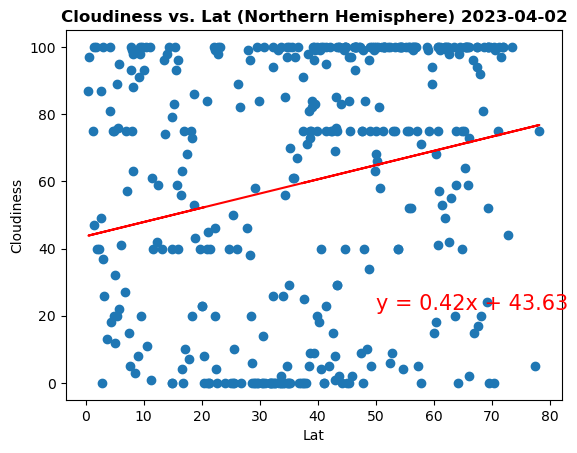

The linear regression line is: y = 0.42x + 43.63
The r-value is: 0.217
The r squared is: 0.047



In [257]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", "(Northern Hemisphere) ",(50,15))

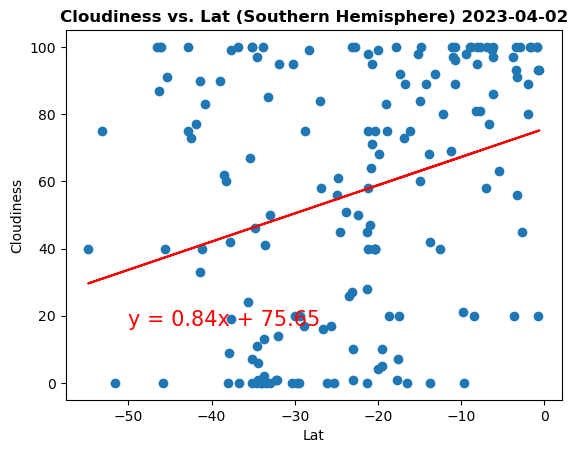

The linear regression line is: y = 0.84x + 75.65
The r-value is: 0.296
The r squared is: 0.088



In [263]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", "(Southern Hemisphere) ",(-50,10))

**Discussion about the linear relationship:** 

When comparing cloudiness against latitude, we seem to have two very slim possitive relationships for both hemispheres with an r value of 0.217 for the Norther and 0.296 for the Southern Hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

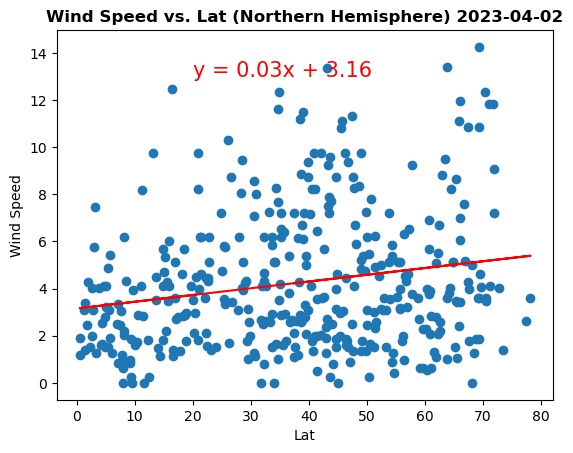

The linear regression line is: y = 0.03x + 3.16
The r-value is: 0.196
The r squared is: 0.038



In [259]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", "(Northern Hemisphere) ",(20,12))

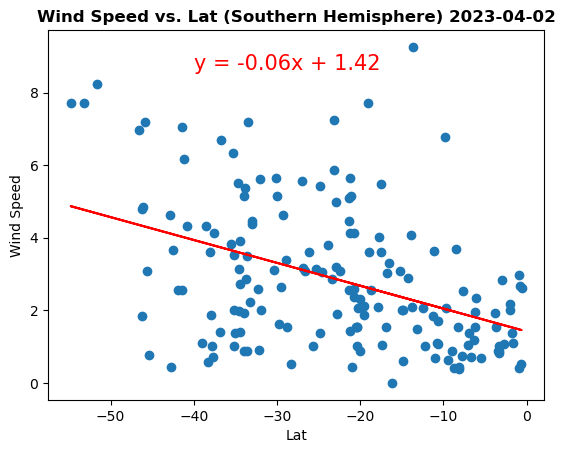

The linear regression line is: y = -0.06x + 1.42
The r-value is: -0.425
The r squared is: 0.18



In [260]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", "(Southern Hemisphere) ",(-40,8))

**Discussion about the linear relationship:** 

Wind Speed vs Latitude shows two opposing relationships. 

    1. Northenr hemisphere: very slim positive relationship with an r value of 0.196

    2. SOuthern Hemisphere: slightly stornger negative relationship with an r value of -0.425